In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [47]:
df = pd.read_csv("./data/BTC-USD.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-02-28,3906.058350,3845.821289,3848.261963,3854.785400,8399767798,3854.785400
1,2019-03-01,3907.795410,3851.692383,3853.757080,3859.583740,7661247975,3859.583740
2,2019-03-02,3874.607422,3832.127930,3855.318115,3864.415039,7578786076,3864.415039
3,2019-03-03,3875.483643,3836.905762,3862.266113,3847.175781,7253558152,3847.175781
4,2019-03-04,3867.381836,3733.749756,3845.091553,3761.557129,9029175788,3761.557129
...,...,...,...,...,...,...,...
1033,2021-12-27,51956.328125,50499.468750,50802.609375,50640.417969,24324345758,50640.417969
1034,2021-12-28,50679.859375,47414.210938,50679.859375,47588.855469,33430376883,47588.855469
1035,2021-12-29,48119.742188,46201.496094,47623.871094,46444.710938,30049226299,46444.710938
1036,2021-12-30,47879.964844,46060.312500,46490.605469,47178.125000,26686491018,47178.125000


In [55]:
temp = ((df['High'].iloc[:-1].values - df['Low'].iloc[:-1].values) * 0.5 + df['Open'].iloc[1:].values)
temp = np.insert(temp, 0, np.nan)
df['Target'] = temp

In [56]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Target
0,2019-02-28,3906.058350,3845.821289,3848.261963,3854.785400,8399767798,3854.785400,NaN
1,2019-03-01,3907.795410,3851.692383,3853.757080,3859.583740,7661247975,3859.583740,3883.875610
2,2019-03-02,3874.607422,3832.127930,3855.318115,3864.415039,7578786076,3864.415039,3883.369629
3,2019-03-03,3875.483643,3836.905762,3862.266113,3847.175781,7253558152,3847.175781,3883.505859
4,2019-03-04,3867.381836,3733.749756,3845.091553,3761.557129,9029175788,3761.557129,3864.380493
...,...,...,...,...,...,...,...,...
1033,2021-12-27,51956.328125,50499.468750,50802.609375,50640.417969,24324345758,50640.417969,51589.246094
1034,2021-12-28,50679.859375,47414.210938,50679.859375,47588.855469,33430376883,47588.855469,51408.289062
1035,2021-12-29,48119.742188,46201.496094,47623.871094,46444.710938,30049226299,46444.710938,49256.695312
1036,2021-12-30,47879.964844,46060.312500,46490.605469,47178.125000,26686491018,47178.125000,47449.728516


In [57]:
df['Percent'] = np.where(df['High'] > df['Target'], df['Close'] / df['Target'], 1)
df

,Date,High,Low,Open,Close,Volume,Adj Close,Target,Percent
0,2019-02-28,3906.058350,3845.821289,3848.261963,3854.785400,8399767798,3854.785400,NaN,1.000000
1,2019-03-01,3907.795410,3851.692383,3853.757080,3859.583740,7661247975,3859.583740,3883.875610,0.993745
2,2019-03-02,3874.607422,3832.127930,3855.318115,3864.415039,7578786076,3864.415039,3883.369629,1.000000
3,2019-03-03,3875.483643,3836.905762,3862.266113,3847.175781,7253558152,3847.175781,3883.505859,1.000000
4,2019-03-04,3867.381836,3733.749756,3845.091553,3761.557129,9029175788,3761.557129,3864.380493,0.973392
...,...,...,...,...,...,...,...,...,...
1033,2021-12-27,51956.328125,50499.468750,50802.609375,50640.417969,24324345758,50640.417969,51589.246094,0.981608
1034,2021-12-28,50679.859375,47414.210938,50679.859375,47588.855469,33430376883,47588.855469,51408.289062,1.000000
1035,2021-12-29,48119.742188,46201.496094,47623.871094,46444.710938,30049226299,46444.710938,49256.695312,1.000000
1036,2021-12-30,47879.964844,46060.312500,46490.605469,47178.125000,26686491018,47178.125000,47449.728516,0.994276


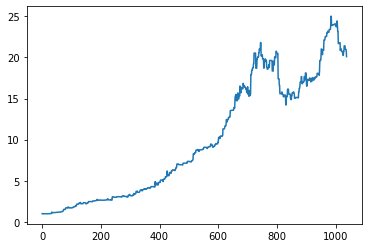

In [58]:
arr = df['Percent'].cumprod()
plt.plot(arr)


In [59]:
df['Drop'] = (1 - df['Percent'] / df['Percent'].cummax()) * 100

In [60]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Target,Percent,Drop
0,2019-02-28,3906.058350,3845.821289,3848.261963,3854.785400,8399767798,3854.785400,NaN,1.000000,0.000000
1,2019-03-01,3907.795410,3851.692383,3853.757080,3859.583740,7661247975,3859.583740,3883.875610,0.993745,0.625454
2,2019-03-02,3874.607422,3832.127930,3855.318115,3864.415039,7578786076,3864.415039,3883.369629,1.000000,0.000000
3,2019-03-03,3875.483643,3836.905762,3862.266113,3847.175781,7253558152,3847.175781,3883.505859,1.000000,0.000000
4,2019-03-04,3867.381836,3733.749756,3845.091553,3761.557129,9029175788,3761.557129,3864.380493,0.973392,2.660798
...,...,...,...,...,...,...,...,...,...,...
1033,2021-12-27,51956.328125,50499.468750,50802.609375,50640.417969,24324345758,50640.417969,51589.246094,0.981608,15.697368
1034,2021-12-28,50679.859375,47414.210938,50679.859375,47588.855469,33430376883,47588.855469,51408.289062,1.000000,14.117825
1035,2021-12-29,48119.742188,46201.496094,47623.871094,46444.710938,30049226299,46444.710938,49256.695312,1.000000,14.117825
1036,2021-12-30,47879.964844,46060.312500,46490.605469,47178.125000,26686491018,47178.125000,47449.728516,0.994276,14.609417


In [61]:
df['Drop'].sort_values()

0       0.000000
2       0.000000
3       0.000000
5       0.000000
27      0.000000
         ...    
746    20.526135
830    20.819437
386    20.991153
728    21.841051
804    27.028315
Name: Drop, Length: 1038, dtype: float64

In [63]:
seed = 1000
df['Profit'] = df['Percent'].cumprod() * seed

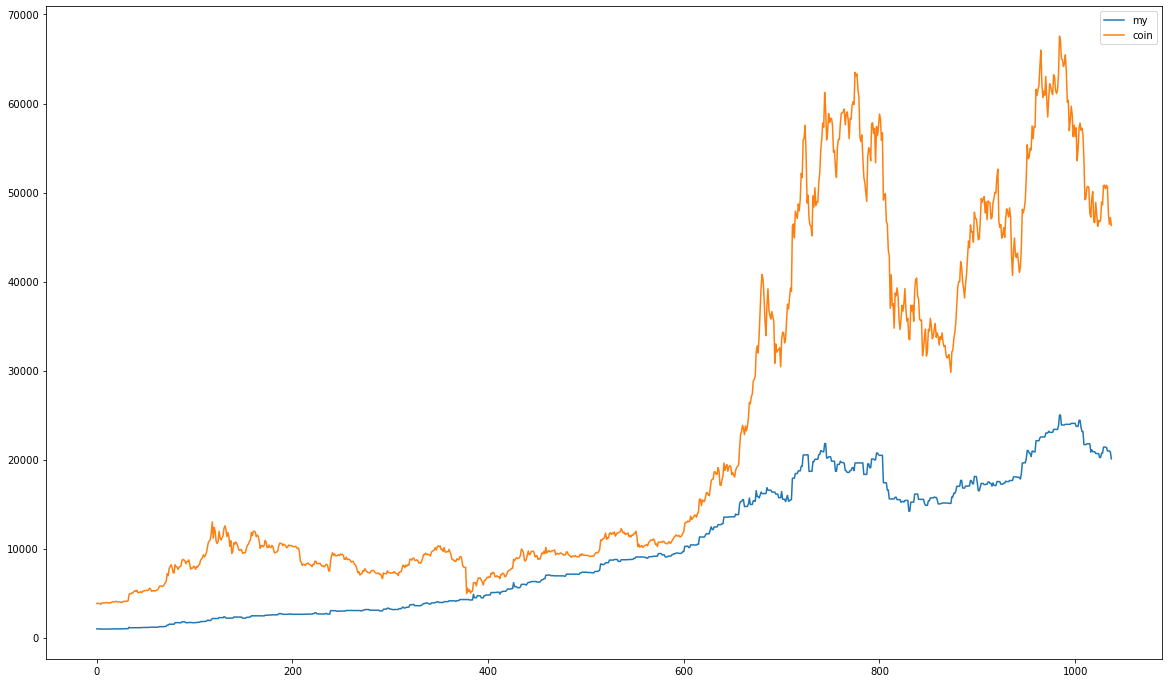

In [64]:
plt.figure(figsize=(20,12))
plt.plot(df['Profit'],label = 'my')
plt.plot(df['Adj Close'],label = 'coin')
plt.legend()